In [109]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
import datetime
import itertools
%matplotlib inline


In [47]:
nms = ['BCH', 'BTC', 'ETC', 'ETH', 'LTC', 'XRP']

In [148]:
nm = 'BTC'
df = pd.read_csv('C:/Users/Wenlu/Documents/DataScience/Data/{}.csv'.format(nm),parse_dates =['time'],infer_datetime_format=True)
#df=df.set_index('time')
df['delta']=df['close']-df['open']
df['incre']=(df['close']-df['open'])/df['open']
df['weekday']=df['time'].apply(lambda x: x.weekday())
df.head()

,time,close,high,low,open,volumefrom,volumeto,delta,incre,weekday
0,2011-08-27,6.14,6.14,6.01,6.01,1.6400,9.87,0.13,0.021631,5
1,2011-08-28,6.40,6.40,6.20,6.14,0.4928,3.10,0.26,0.042345,6
2,2011-08-29,6.40,6.40,6.40,6.40,0.0000,0.00,0.00,0.000000,0
3,2011-08-30,6.40,6.40,6.40,6.40,0.0000,0.00,0.00,0.000000,1
4,2011-08-31,6.40,6.40,6.40,6.40,0.0000,0.00,0.00,0.000000,2


In [153]:
df['y']=df.loc[1:,'close'].reset_index(drop=True)

In [154]:
df.head()

,time,close,high,low,open,volumefrom,volumeto,delta,incre,weekday,y
0,2011-08-27,6.14,6.14,6.01,6.01,1.6400,9.87,0.13,0.021631,5,6.4
1,2011-08-28,6.40,6.40,6.20,6.14,0.4928,3.10,0.26,0.042345,6,6.4
2,2011-08-29,6.40,6.40,6.40,6.40,0.0000,0.00,0.00,0.000000,0,6.4
3,2011-08-30,6.40,6.40,6.40,6.40,0.0000,0.00,0.00,0.000000,1,6.4
4,2011-08-31,6.40,6.40,6.40,6.40,0.0000,0.00,0.00,0.000000,2,6.4


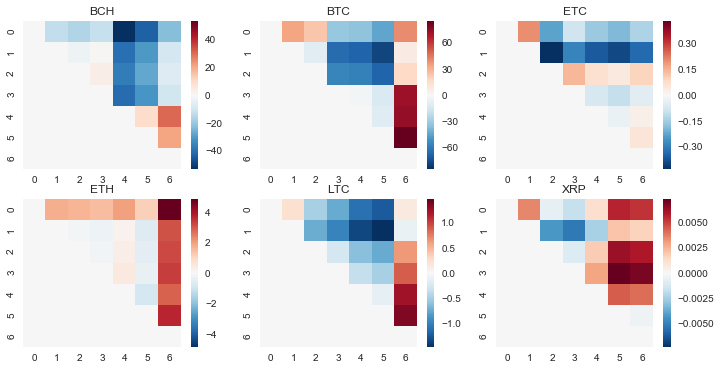

In [128]:
fig, ax = plt.subplots(2,3,figsize=(12,6))
for k,nm in enumerate(nms):
    df = pd.read_csv('C:/Users/Wenlu/Documents/DataScience/Data/{}.csv'.format(nm),parse_dates =['time'],infer_datetime_format=True)
    df=df[df['time']>datetime.date(2017,5,1)]
    #df=df.set_index('time')
    df['delta']=df['close']-df['open']
    df['weekday']=df['time'].apply(lambda x: x.weekday())
    res= list(df.groupby('weekday')['close'].mean())
    diffmat=np.zeros((7,7))
    for i,j in list(itertools.combinations(range(7), 2)):
        diffmat[i,j]=res[i]- res[j] 
    sns.heatmap(diffmat,ax=ax[k/3,k%3])
    ax[k/3,k%3].set_title(nm)


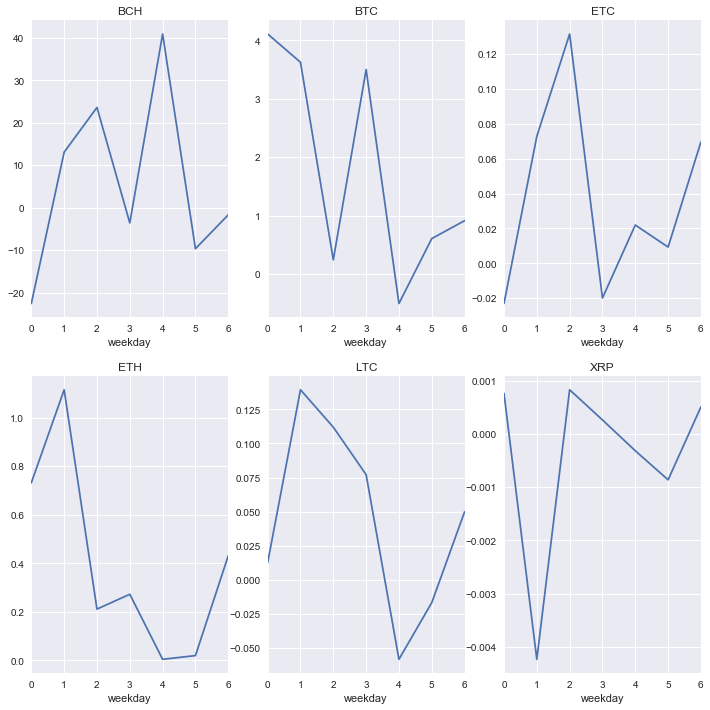

In [95]:
fig, ax = plt.subplots(2,3,figsize=(12,12))
for i,nm in enumerate(nms):
    df = pd.read_csv('C:/Users/Wenlu/Documents/DataScience/Data/{}.csv'.format(nm),parse_dates =['time'],infer_datetime_format=True)
    #df=df.set_index('time')
    df['delta']=df['close']-df['open']
    df['weekday']=df['time'].apply(lambda x: x.weekday())
    df.groupby('weekday')['delta'].mean().plot(ax=ax[i/3,i%3])
    ax[i/3,i%3].set_title(nm)

In [137]:
dfs=[]
for nm in nms:
    df = pd.read_csv('C:/Users/Wenlu/Documents/DataScience/Data/{}.csv'.format(nm),parse_dates =['time'],infer_datetime_format=True)
    df=df.set_index('time')
    df = (df['close']-df['open'])/df['open']
    df=df.rename(nm)
    dfs.append(df)
dfall=pd.concat(dfs,axis=1)

In [74]:
dfs=[]
for nm in nms:
    df = pd.read_csv('C:/Users/Wenlu/Documents/DataScience/Data/{}.csv'.format(nm),parse_dates =['time'],infer_datetime_format=True)
    df=df.set_index('time')
    df = df['open']
    df=df.rename(nm)
    dfs.append(df)

In [146]:
dfa=dfall[datetime.date(2017,5,1):]

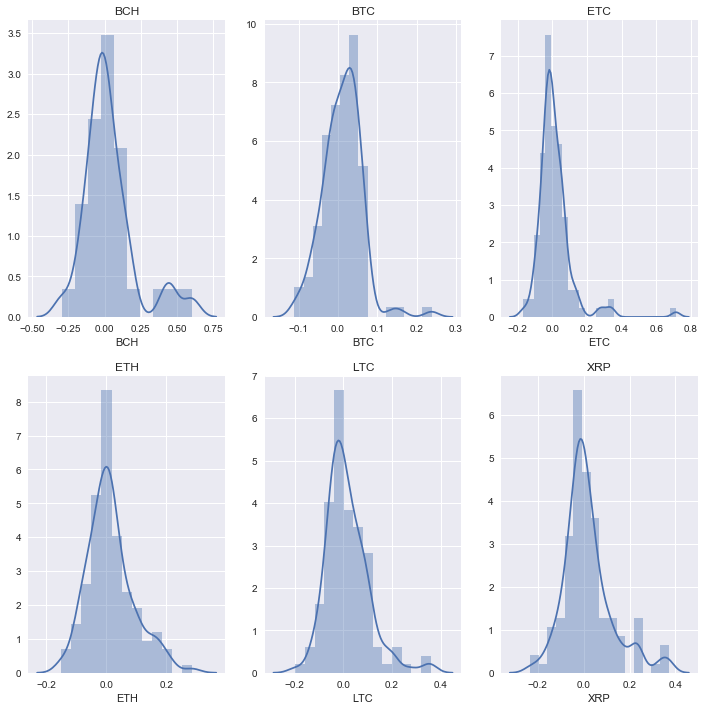

In [147]:
fig, ax = plt.subplots(2,3,figsize=(12,12))
for i,col in enumerate(dfa.columns.values):
    s=dfa[col]
    s=s[~s.isnull()]
    sns.distplot(s,ax=ax[i/3,i%3])
    ax[i/3,i%3].set_title(col)

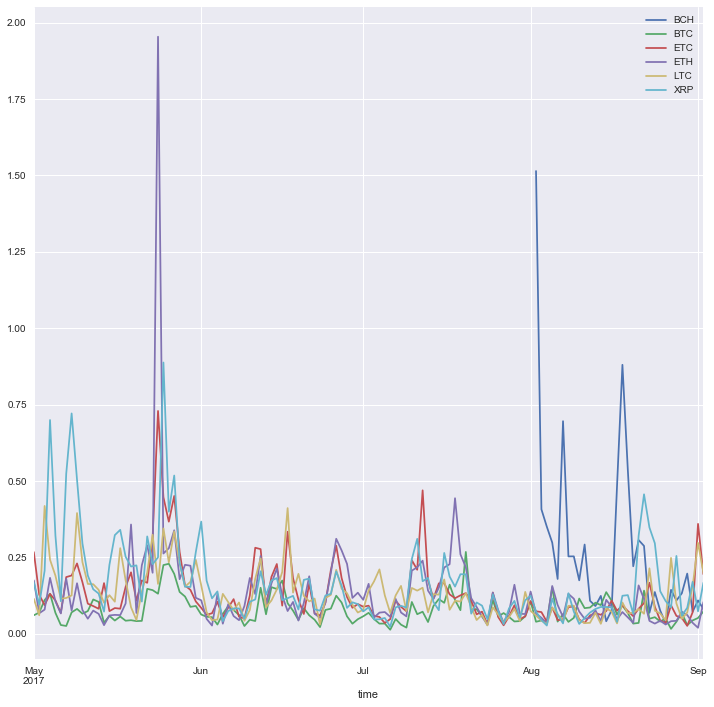

In [136]:
dfa.plot(figsize=(12,12))

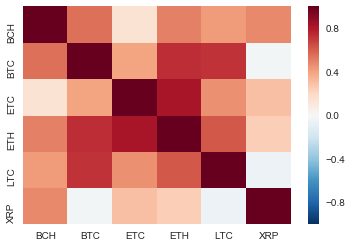

In [86]:
sns.heatmap(dfa.corr())

In [41]:
plotly.offline.init_notebook_mode(connected=True)
trace = go.Candlestick(x=df.time,
                       open=df.open,
                       high=df.high,
                       low=df.low,
                       close=df.close)
data = [trace]
plotly.offline.iplot(data, filename='candlestick_datetime')

In [26]:
type(df.iloc[0,0])

pandas.tslib.Timestamp

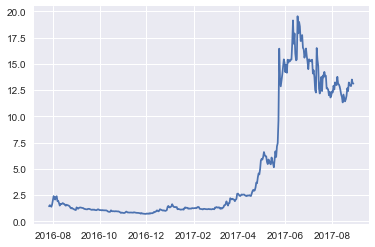

In [27]:
plt.plot(df['time'],df['close'])

IndexError: invalid index to scalar variable.

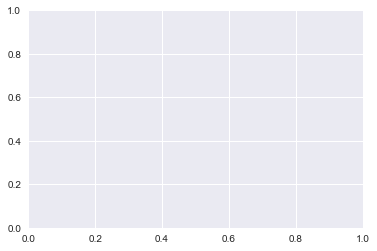

In [30]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
#df["time"] = df["time"].apply(lambda d: mdates.date2num(d.to_pydatetime()))
fig, ax = plt.subplots(1,1)
candlestick_ohlc(ax,df['open'],df['high'],df['low'],df['close'])